- RSI(상대강도 지수)
: 머신러닝에도 사용\
: 14일간의 종가를사용\
: '각 14일간 거래일이 종가로 전일 종가보다 상승한 변화량 평균 & 하락한 변화량의 평균'을 구한 후에 나누는 방식

In [6]:
!pip install finance-datareader

In [228]:
import FinanceDataReader as fdr
df = fdr.DataReader("005930")

In [231]:
#변화량
df['변화량'] = df['Close'].diff()

In [237]:
#상승폭, 하락폭
df.loc[df['변화량'] >= 0, "상승폭"] = df['변화량']
df.loc[df['변화량'] <0, "하락폭"] = -df['변화량'] #양수로 값 넣기
df.fillna(0)

,Open,High,Low,Close,Volume,Change,변화량,상승폭,하락폭
Date,,,,,,,,,
2000-07-06,7240,7350,7179,7300,1206852,0.000000,0.0,0.0,0.0
2000-07-07,7340,7460,7230,7360,811625,0.008219,60.0,60.0,0.0
2000-07-10,7440,7630,7410,7600,850172,0.032609,240.0,240.0,0.0
2000-07-11,7580,7740,7450,7450,698992,-0.019737,-150.0,0.0,150.0
2000-07-12,7520,7660,7460,7640,802868,0.025503,190.0,190.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-10-23,57500,60000,57100,59100,27300780,0.024263,1400.0,1400.0,0.0
2024-10-24,58200,58500,56600,56600,31499922,-0.042301,-2500.0,0.0,2500.0
2024-10-25,56000,56900,55800,55900,25829315,-0.012367,-700.0,0.0,700.0


**원리**

In [178]:
df['AU'] = df['상승폭'].rolling(window=14).mean()
df['DU'] = df['하락폭'].rolling(window=14).mean()
df['RSI'] = df['AU'] / (df['AU'] + df['DU'])*100
df.dropna()

df
#70이상이면 매도 신호
#30이하이면 매수 신호

,Open,High,Low,Close,Volume,Change,변화량,상승폭,하락폭,AU,DU,RSI,state
Date,,,,,,,,,,,,,
2000-07-06,7240,7350,7179,7300,1206852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hold
2000-07-07,7340,7460,7230,7360,811625,0.008219,60.0,60.0,NaN,NaN,NaN,NaN,Hold
2000-07-10,7440,7630,7410,7600,850172,0.032609,240.0,240.0,NaN,NaN,NaN,NaN,Hold
2000-07-11,7580,7740,7450,7450,698992,-0.019737,-150.0,NaN,150.0,NaN,NaN,NaN,Hold
2000-07-12,7520,7660,7460,7640,802868,0.025503,190.0,190.0,NaN,NaN,NaN,NaN,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,57500,60000,57100,59100,27300780,0.024263,1400.0,1400.0,NaN,NaN,NaN,NaN,Hold
2024-10-24,58200,58500,56600,56600,31499922,-0.042301,-2500.0,NaN,2500.0,NaN,NaN,NaN,Hold
2024-10-25,56000,56900,55800,55900,25829315,-0.012367,-700.0,NaN,700.0,NaN,NaN,NaN,Hold


**함수**

In [181]:
def make_rsi(close, period = 14):
    delta = close.diff()

    gain = delta.where(delta >= 0, 0) #델타가 0이상인 값만 가져오고 아니면 0으로 채우기
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window = period).mean()
    avg_loss = loss.rolling(window = period).mean()

    rsi = avg_gain / (avg_gain + avg_loss)*100

    return rsi

In [191]:
df['RSI'] = make_rsi(df['Close'])

**RSI기반 매도 매수 함수**

In [194]:
def func1(x):
    if x<= 30:
        return "Buy"
    elif x >= 70:
        return "sell"
    else:
        return "Hold"

df['state'] = df['RSI'].apply(func1)
df

,Open,High,Low,Close,Volume,Change,변화량,상승폭,하락폭,AU,DU,RSI,state
Date,,,,,,,,,,,,,
2000-07-06,7240,7350,7179,7300,1206852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hold
2000-07-07,7340,7460,7230,7360,811625,0.008219,60.0,60.0,NaN,NaN,NaN,NaN,Hold
2000-07-10,7440,7630,7410,7600,850172,0.032609,240.0,240.0,NaN,NaN,NaN,NaN,Hold
2000-07-11,7580,7740,7450,7450,698992,-0.019737,-150.0,NaN,150.0,NaN,NaN,NaN,Hold
2000-07-12,7520,7660,7460,7640,802868,0.025503,190.0,190.0,NaN,NaN,NaN,NaN,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,57500,60000,57100,59100,27300780,0.024263,1400.0,1400.0,NaN,NaN,NaN,38.679245,Hold
2024-10-24,58200,58500,56600,56600,31499922,-0.042301,-2500.0,NaN,2500.0,NaN,NaN,31.782946,Hold
2024-10-25,56000,56900,55800,55900,25829315,-0.012367,-700.0,NaN,700.0,NaN,NaN,31.782946,Hold


**매수매도 시각화**

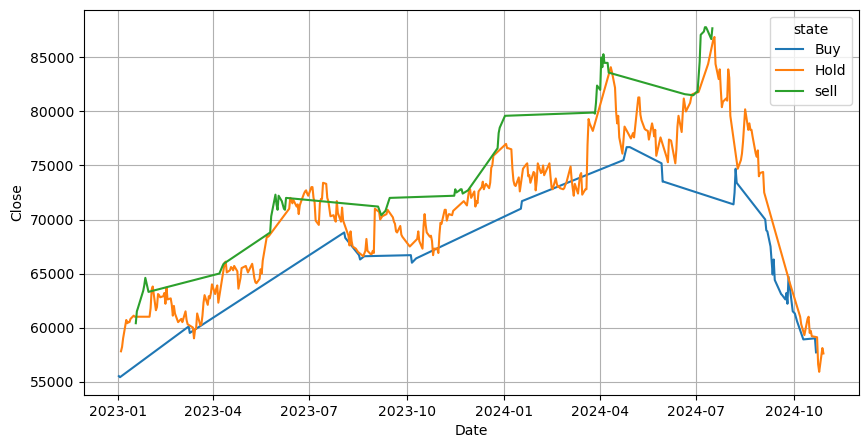

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df[df.index.year >= 2023]

plt.figure(figsize = (10,5))

sns.lineplot(data = df2, x = df2.index, y = 'Close', hue = 'state')

plt.grid()
plt.show()

**최근값 가중치 버전 RSI**

In [233]:
import pandas as pd

##연습
data = {"price" : [1,2,4,8,16,32,64,128,256,512,1024]}

sample = pd.DataFrame(data)
sample['MA'] = sample['price'].rolling(window = 5).mean()
sample['EMA'] = sample['price'].ewm(span = 5, adjust = False).mean()
sample

,price,MA,EMA
0,1,NaN,1.000000
1,2,NaN,1.333333
2,4,NaN,2.222222
3,8,NaN,4.148148
4,16,6.2,8.098765
5,32,12.4,16.065844
6,64,24.8,32.043896
7,128,49.6,64.029264
8,256,99.2,128.019509
9,512,198.4,256.013006


In [239]:
## 실제
df['AU'] = df['상승폭'].ewm(span = 14, adjust = False).mean() #최신값에 가중치
df['DU'] = df['하락폭'].ewm(span = 14, adjust = False).mean()
df['RSI'] = df['AU'] / (df['AU'] + df['DU'])*100

df

,Open,High,Low,Close,Volume,Change,변화량,상승폭,하락폭,AU,DU,RSI
Date,,,,,,,,,,,,
2000-07-06,7240,7350,7179,7300,1206852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-07,7340,7460,7230,7360,811625,0.008219,60.0,60.0,NaN,60.000000,NaN,NaN
2000-07-10,7440,7630,7410,7600,850172,0.032609,240.0,240.0,NaN,84.000000,NaN,NaN
2000-07-11,7580,7740,7450,7450,698992,-0.019737,-150.0,NaN,150.0,84.000000,150.000000,35.897436
2000-07-12,7520,7660,7460,7640,802868,0.025503,190.0,190.0,NaN,99.979899,150.000000,39.995175
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,57500,60000,57100,59100,27300780,0.024263,1400.0,1400.0,NaN,878.920330,984.663093,47.162918
2024-10-24,58200,58500,56600,56600,31499922,-0.042301,-2500.0,NaN,2500.0,878.920330,1213.105843,42.012874
2024-10-25,56000,56900,55800,55900,25829315,-0.012367,-700.0,NaN,700.0,878.920330,1144.691730,43.433242


**가중치 RSI 함수**

In [242]:
def make_ewm_rsi(close, period = 14):
    delta = close.diff()

    gain = delta.where(delta >= 0, 0) 
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(span = 14, adjust = False).mean()
    avg_loss = loss.ewm(span = 14, adjust = False).mean()

    rsi = avg_gain / (avg_gain + avg_loss)*100

    return rsi

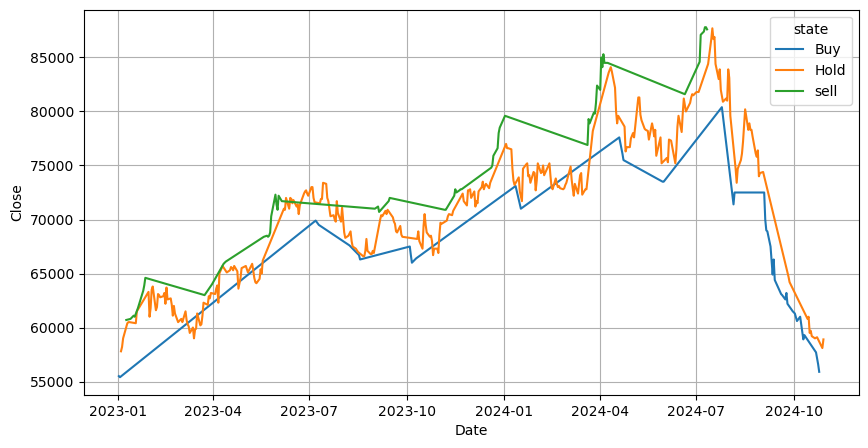

In [252]:
df['RSI'] = make_ewm_rsi(df['Close'])
df['state'] = df['RSI'].apply(func1)

df2 = df[df.index.year >= 2023]

plt.figure(figsize = (10,5))

sns.lineplot(data = df2, x = df2.index, y = 'Close', hue = 'state')

plt.grid()
plt.show()